# Homework 1

Homework policy: the homework is individual. Students are encouraged to discuss with fellow students to try to find the main structure of the solution for a problem, especially if they are totally stuck at the beginning of the problem. However, you should work out the details yourself and write down in your own words only what you understand yourself.

## Problem: ML Estimation of Roundtrip Delay Distribution¶

In this problem, we consider the roundtrip delay in a computer network (internet) between the computer we’re working on and another computer connected to the network. This roundtrip delay will be different, every time we send a message. As such, it can be modeled as a random variable y. For the design of network protocols and for their performance evaluation, it is important to know the distribution of this random roundtrip delay. To turn the estimation of the roundtrip delay distribution into a parameter estimation problem, we shall take a parametric distribution, parameterized by one or more parameters. Since we don’t have too much information about this variable y (except that it should be positive), we shall try several parametric distributions. In particular, we shall consider the following distributions:

$$
\begin{gather}
\text { * A Gaussian distribution: } \qquad f_G (y|\mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}  e^{-\frac{(y−\mu)^2}{2\sigma^2}} 
\qquad \qquad \qquad \qquad \qquad \qquad 
\\
\text { * A Rayleigh distribution: } \qquad f_R (y|\sigma^2) = 
\begin{cases}
0 & , y < 0
\\
\frac{y}{\sigma^2}  e^{-\frac{y^2}{2\sigma^2}} & , y \geq 0
\end{cases} 
\qquad \qquad \qquad \qquad \qquad \qquad
\end{gather}
$$

In [10]:
using Turing
using StatsPlots

Then, we define a simple Normal model with unknown mean and variance

In [11]:
@model function gdemo(x, ::Type{T} = Float64) where {T}
    if x === missing
        # Initialize `x` if missing
        x = Vector{T}(undef, 2)
    end
    s² ~ InverseGamma(2, 3)
    m ~ Normal(0, sqrt(s²))
    R ~ Rayleigh()
    # E₀ ~ Erlang(0)
    E₁ ~ Erlang(1)
    E₂ ~ Erlang(2)
    exp ~ Exponential()
    for i in eachindex(x)
        x[i] ~ Normal(m, sqrt(s²))
    end
end

gdemo (generic function with 4 methods)

Then we can run a sampler to collect results. In this case, it is a Hamiltonian Monte Carlo sampler with [NUTS](https://turing.ml/v0.22/docs/library/#Turing.Inference.NUTS)

In [12]:
# Construct a model with x = missing
model = gdemo(missing)
c = sample(model, NUTS(), 500)

┌ Info: Found initial step size
└   ϵ = 0.203125
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00


Chains MCMC chain (500×20×1 Array{Float64, 3}):

Iterations        = 251:1:750
Number of chains  = 1
Samples per chain = 500
Wall duration     = 2.06 seconds
Compute duration  = 2.06 seconds
parameters        = s², m, R, E₁, E₂, exp, x[1], x[2]
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std      mcse   ess_bulk   ess_tail      rhat   e ⋯
      Symbol   Float64   Float64   Float64    Float64    Float64   Float64     ⋯

          s²    2.4527    2.9486    0.2133   173.6736   203.5139    0.9984     ⋯
           m    0.0120    1.4529    0.1004   218.3224   170.0794    1.0005     ⋯
           R    1.2654    0.6337    0.0249   488.3533   138.4316    1.0125     ⋯
          E₁    0.9725    0.8847    0.0389   388.8691   408.3394    0.9997     ⋯
          E₂    2.0013    1.4643    0.0683  

We can plot the results

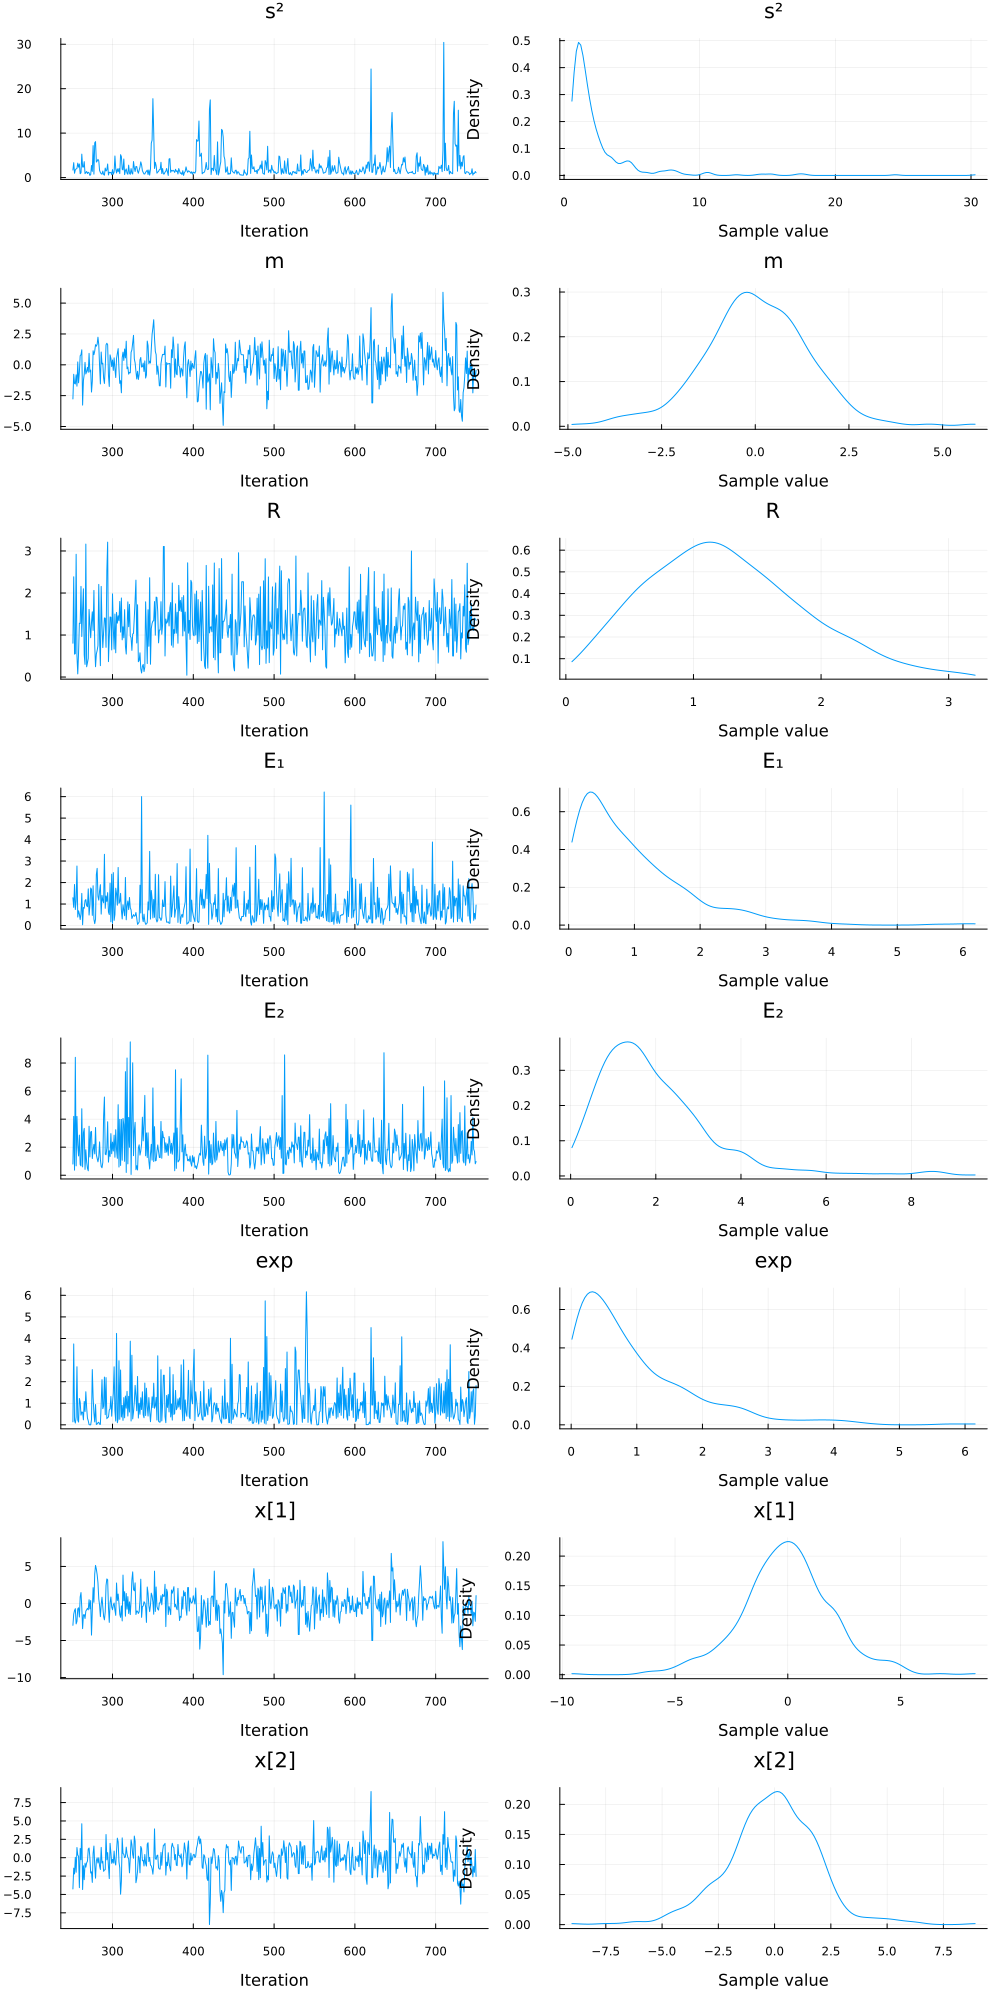

In [13]:
plot(c)

In [14]:
using Optim

In [15]:
mle = Optim.optimize(model, MLE())
mle.values

8-element Named Vector{Float64}
A    │ 
─────┼───────────
s²   │    1.73438
m    │  -0.580244
R    │   0.558063
E₁   │   0.411674
E₂   │    1.41031
exp  │     0.4422
x[1] │ -0.0669425
x[2] │   -3.28856

In [16]:
argmax = maximum(mle.values)

1.734380344498992

##### 💡 MLE - related references
- [ ] [The function fit_mle is for maximum likelihood estimation.](https://juliastats.org/Distributions.jl/stable/fit/#Maximum-Likelihood-Estimation)
- [ ] [A demonstration of doing maximum likelihood estimation using Julia](https://mmmlab.rbind.io/posts/2021-03-09-julia-mle/)

In this case, because we use the [normal-inverse gamma distribution](https://en.wikipedia.org/wiki/Normal-inverse-gamma_distribution) as a [conjugate prior](https://en.wikipedia.org/wiki/Conjugate_prior), we can compute its updated mean as follows:

# References

- [ ] [Using Turing: Getting Started](https://turinglang.org/v0.29/docs/using-turing/get-started)
- [ ] [Some question about the structure of Turing models](https://discourse.julialang.org/t/some-question-about-the-structure-of-turing-models/48211/17)
- [ ] [Model building of golf putting with Turing.jl](https://jduncstats.com/posts/2019-11-02-golf-turing/)
- [ ] [Rayleigh Distribution - Generating a Random Sample with Inverse Transforms Sampling](https://www.youtube.com/watch?v=GVphZq7Siro)
- [ ] [A comparison of common distributions in Julia, Python and R](https://discourse.julialang.org/t/a-comparison-of-common-distributions-in-julia-python-and-r)
- [ ] [Parameter estimation of a Rayleigh random variable with an offset](https://stats.stackexchange.com/questions/224416/parameter-estimation-of-a-rayleigh-random-variable-with-an-offset)
- [ ] [Maximum Likelihood Estimation with Julia](https://mmmlab.rbind.io/posts/2021-03-09-julia-mle/)
- [ ] [ref_emoji](https://www.w3schools.com/charsets/ref_emoji.asp)
- [ ] [How to Easily Insert Emoji in the Jupyter Notebook](https://medium.com/@shouke.wei/how-to-easily-insert-emoji-in-the-jupyter-notebook-36a1b77c0cb4)